<a href="https://colab.research.google.com/github/Lionel-Lim/casa0018/blob/main/Assessment/Projects/Final%20Project/src/trainingData/test_5/trainingModel_test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

In [2]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("500")')

In [3]:
!wget https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_4/test_4.zip
!unzip test_4.zip

--2023-03-19 02:07:08--  https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_4/test_4.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88717531 (85M) [application/zip]
Saving to: ‘test_4.zip.1’

test_4.zip.1        100%[===================>]  84.61M   185MB/s    in 0.5s    

2023-03-19 02:07:09 (185 MB/s) - ‘test_4.zip.1’ saved [88717531/88717531]

Archive:  test_4.zip
replace __MACOSX/._test_filtered? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test_filtered/127_1117.126284739.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test_filtered/127_1117.126284739.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_filtered/127_1117.126284739.png  
 

In [4]:
# Define the headers
headers = ['timestamp', 'status', 'orientation', 'position', 'acceleration']

# Read in the CSV files as DataFrames
train_df = pd.read_csv("training_filtered.csv",header=None, names=headers)
valid_df = pd.read_csv("validate_filtered.csv",header=None, names=headers)
test_df = pd.read_csv("testData_filtered.csv",header=None, names=headers)

# Select only the first 90% of the data
eighty_percent_index = int(0.9 * len(train_df))
train_df = train_df.iloc[:eighty_percent_index]
eighty_percent_index = int(0.9 * len(valid_df))
valid_df = valid_df.iloc[:eighty_percent_index]
eighty_percent_index = int(0.9 * len(test_df))
test_df = test_df.iloc[:eighty_percent_index]

# Add a new column to each DataFrame to identify it
train_df = train_df.assign(dataset='training')
valid_df = valid_df.assign(dataset='validation')
test_df = test_df.assign(dataset='test')

In [5]:
# Add a new column for the depth images
train_df['depth_image'] = None
valid_df['depth_image'] = None
test_df['depth_image'] = None
imageAddress = [
    "/content/training_filtered",
    "/content/validate_filtered",
    "/content/test_filtered"]



for index, df in enumerate([train_df, valid_df, test_df]):
  # Load the depth images and add them to the DataFrame
  for i, row in df.iterrows():
      # Get the timestamp and image file name
      timestamp = row['timestamp']
      partial_image_name = f"{timestamp}.png"

      file_names = [f for f in os.listdir(imageAddress[index]) if os.path.isfile(os.path.join(imageAddress[index], f))]
      for name in file_names:
        if partial_image_name in name:
          image_name = name
          break


      # Load the image and convert it to a numpy array
      image_path = os.path.join(imageAddress[index], image_name)
      image = Image.open(image_path)
      # Convert the image to a numpy array
      image_array = np.array(image)
      # Reshape the array to have the correct dimensions
      image_array = image_array.reshape((1, 400, 640, 1))

      # Squeeze the array to remove the first dimension and get a 2D array
      image_array = image_array.squeeze()

      # Add the image array to the DataFrame
      df.at[i, 'depth_image'] = image_array

In [6]:
# Concatenate all the DataFrames into a single DataFrame
all_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

# Print the first few rows to check if the new column has been added
all_df

,timestamp,status,orientation,position,acceleration,dataset,depth_image
0,765.928284,TRACKING,-0.3821582940036269/0.565644928702032/-0.60416...,0.00431119679577456/0.012621240850431247/0.024...,-6.436549205382248e-05/-1.7008188548929915e-05...,training,"[[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
1,766.128227,TRACKING,-0.3921728755276281/0.5610758834415921/-0.5958...,-0.0028496002688221233/0.021909578133051662/0....,-0.0012899692375450125/-0.0003408665002690985/...,training,"[[6, 9, 12, 13, 14, 14, 14, 14, 15, 16, 18, 19..."
2,766.328076,TRACKING,-0.42045968459333843/0.5463356661997151/-0.573...,-0.017439763383390844/0.030261957894410246/-0....,-0.0010125449935970048/-0.00026755883651090887...,training,"[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,..."
3,766.727595,TRACKING,-0.4142636241738888/0.5628696080818422/-0.5711...,-0.004423545511615707/0.04190686128072127/-0.0...,-0.0010431929360426675/-0.0002756573683036388/...,training,"[[22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, ..."
4,767.162666,TRACKING,-0.424028494401779/0.556239291554674/-0.569920...,0.016697937975901554/0.042439496052923985/-0.0...,-0.0003495121565044577/-9.235645480656102e-05/...,training,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
...,...,...,...,...,...,...,...
2497,1171.021544,TRACKING,0.6271466060141294/-0.7761559014000539/0.05763...,5.324377465381061/-2.3454707200967415/-0.03970...,-0.021052178597548973/-0.005562909744455156/-0...,test,"[[3, 3, 3, 2, 2, 2, 2, 4, 6, 6, 8, 8, 8, 8, 7,..."
2498,1171.188870,TRACKING,0.6214506775800698/-0.7779870246054463/0.07861...,5.330844479282574/-2.194193344089303/-0.029312...,-0.005120642473184986/-0.001353098529919758/-0...,test,"[[8, 8, 10, 11, 12, 14, 15, 17, 18, 19, 19, 19..."
2499,1171.422088,TRACKING,0.6139359603358122/-0.7802726703525682/0.09844...,5.3675229526440225/-2.019174830992702/-0.05542...,-5.0506651630276296e-05/-1.3346074526774984e-0...,test,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4,..."
2500,1171.621929,TRACKING,0.6121111473026454/-0.7835755610064945/0.08992...,5.416105249115415/-1.8003918206893395/-0.06021...,-0.0017429973793968408/-0.000460576422600527/-...,test,"[[2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,..."


In [7]:
# Split the orientation column into four separate columns
all_df[['ori_w', 'ori_x', 'ori_y', 'ori_z']] = all_df['orientation'].str.split('/', expand=True)

# Split the position column into three separate columns
all_df[['pos_x', 'pos_y', 'pos_z']] = all_df['position'].str.split('/', expand=True)

# Split the acceleration column into three separate columns
all_df[['acc_x', 'acc_y', 'acc_z']] = all_df['acceleration'].str.split('/', expand=True)

# Convert the data types of the columns to float32
all_df = all_df.astype({'ori_w': 'float32', 'ori_x': 'float32', 'ori_y': 'float32', 'ori_z': 'float32', 'pos_x': 'float32', 'pos_y': 'float32', 'pos_z': 'float32', 'acc_x': 'float32', 'acc_y': 'float32', 'acc_z': 'float32'})
all_df['depth_image'] = all_df['depth_image'].apply(lambda x: x.astype('float32'))

# # Find the global maximum pixel value across all depth images
# global_max_pixel_value = np.max([np.max(img) for img in all_df['depth_image']])

# # Normalize all depth images using the global maximum pixel value
# all_df['normalized_depth_image'] = all_df['depth_image'].apply(lambda img: img / global_max_pixel_value)

all_df = all_df.drop(['orientation', 'position', 'acceleration'], axis=1)
all_df.head()

,timestamp,status,dataset,depth_image,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z
0,765.928284,TRACKING,training,"[[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",-0.382158,0.565645,-0.604166,0.411077,0.004311,0.012621,0.024815,-0.000064,-0.000017,-0.000004
1,766.128227,TRACKING,training,"[[6.0, 9.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0...",-0.392173,0.561076,-0.595854,0.419944,-0.002850,0.021910,0.007111,-0.001290,-0.000341,-0.000071
2,766.328076,TRACKING,training,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,...",-0.420460,0.546336,-0.573029,0.443136,-0.017440,0.030262,-0.012189,-0.001013,-0.000268,-0.000056
3,766.727595,TRACKING,training,"[[22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 24.0, 24...",-0.414264,0.562870,-0.571193,0.430467,-0.004424,0.041907,-0.071835,-0.001043,-0.000276,-0.000058
4,767.162666,TRACKING,training,"[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",-0.424028,0.556239,-0.569920,0.431265,0.016698,0.042439,-0.064486,-0.000350,-0.000092,-0.000019


In [8]:
# Convert the depth image data to a 4D numpy array of shape (num_samples, 400, 640, 1)
depth_data = np.stack(all_df['depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)

# Convert the orientation data to a numpy array
ori_data = all_df[['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()

# Convert the orientation data to a numpy array
# acc_data = all_df[['acc_x', 'acc_y', 'acc_z']].to_numpy()
acc_data = all_df[['acc_x', 'acc_y']].to_numpy()

# Convert the current position data to a numpy array
# curr_pos_data = all_df[['pos_x', 'pos_y', 'pos_z']].to_numpy()
curr_pos_data = all_df[['pos_x', 'pos_y']].to_numpy()

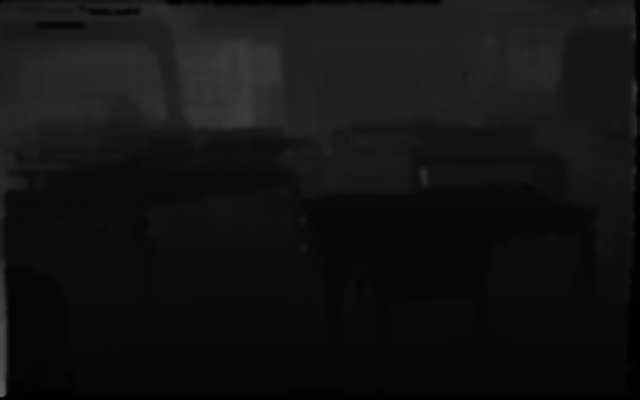

In [25]:
# Convert the NumPy array back to an image
img = Image.fromarray(depth_data[1])

# Show the image
img.show()


In [9]:
# Create boolean masks for each dataset
train_mask = all_df['dataset'] == 'training'
test_mask = all_df['dataset'] == 'test'
valid_mask = all_df['dataset'] == 'validation'

# Extract the data for each dataset
train_depth = np.stack(all_df.loc[train_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
train_ori = all_df.loc[train_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# train_acc = all_df.loc[train_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# train_pos = all_df.loc[train_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
train_acc = all_df.loc[train_mask, ['acc_x', 'acc_y']].to_numpy()
train_pos = all_df.loc[train_mask, ['pos_x', 'pos_y']].to_numpy()

test_depth = np.stack(all_df.loc[test_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
test_ori = all_df.loc[test_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# test_acc = all_df.loc[test_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# test_pos = all_df.loc[test_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
test_acc = all_df.loc[test_mask, ['acc_x', 'acc_y']].to_numpy()
test_pos = all_df.loc[test_mask, ['pos_x', 'pos_y']].to_numpy()

val_depth = np.stack(all_df.loc[valid_mask, 'depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)
val_ori = all_df.loc[valid_mask, ['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()
# val_acc = all_df.loc[valid_mask, ['acc_x', 'acc_y', 'acc_z']].to_numpy()
# val_pos = all_df.loc[valid_mask, ['pos_x', 'pos_y', 'pos_z']].to_numpy()
val_acc = all_df.loc[valid_mask, ['acc_x', 'acc_y']].to_numpy()
val_pos = all_df.loc[valid_mask, ['pos_x', 'pos_y']].to_numpy()

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth.shape}, ori={train_ori.shape}, acc={train_acc.shape}, curr_pos={train_pos.shape}')
print(f'Validation data shapes: depth={val_depth.shape}, ori={val_ori.shape}, acc={val_acc.shape}, curr_pos={val_pos.shape}')
print(f'test data shapes: depth={test_depth.shape}, ori={test_ori.shape}, acc={test_acc.shape}, curr_pos={test_pos.shape}')

Training data shapes: depth=(1625, 400, 640), ori=(1625, 4), acc=(1625, 2), curr_pos=(1625, 2)
Validation data shapes: depth=(477, 400, 640), ori=(477, 4), acc=(477, 2), curr_pos=(477, 2)
test data shapes: depth=(400, 400, 640), ori=(400, 4), acc=(400, 2), curr_pos=(400, 2)


In [11]:
# Function to generate time series data
def generate_time_series_data(data, n_steps):
    num_samples, num_features = data.shape
    X = np.zeros((num_samples - n_steps + 1, n_steps, num_features))
    
    for i in range(num_samples - n_steps + 1):
        X[i] = data[i:i + n_steps]
    
    return X
  
# Define the number of time steps
n_steps = 10

# Combine orientation and acceleration data
train_other_data = np.concatenate([train_ori, train_acc], axis=1)
val_other_data = np.concatenate([val_ori, val_acc], axis=1)
test_other_data = np.concatenate([test_ori, test_acc], axis=1)

# Generate time series data for orientation and acceleration
train_other_data_time_series = generate_time_series_data(train_other_data, n_steps)
val_other_data_time_series = generate_time_series_data(val_other_data, n_steps)
test_other_data_time_series = generate_time_series_data(test_other_data, n_steps)

# Update position data to match the time series data
train_curr_pos_time_series = train_pos[n_steps - 1:]
val_curr_pos_time_series = val_pos[n_steps - 1:]
test_curr_pos_time_series = test_pos[n_steps - 1:]

In [ ]:
# Function to generate time series data for depth maps and other data
def generate_time_series_data(data, n_steps):
    if len(data.shape) == 3:  # Handling depth maps
        num_samples, height, width = data.shape
        X = np.zeros((num_samples - n_steps + 1, n_steps, height, width))
        
        for i in range(num_samples - n_steps + 1):
            X[i] = data[i:i + n_steps]

        return X[..., np.newaxis]

    else:  # Handling other data
        num_samples, num_features = data.shape
        X = np.zeros((num_samples - n_steps + 1, n_steps, num_features))

        for i in range(num_samples - n_steps + 1):
            X[i] = data[i:i + n_steps]

        return X

# Generate time series data for depth maps
train_depth_time_series = generate_time_series_data(train_depth, n_steps)
val_depth_time_series = generate_time_series_data(val_depth, n_steps)
test_depth_time_series = generate_time_series_data(test_depth, n_steps)

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth_time_series.shape}, other_data={train_other_data_time_series.shape}, curr_pos={train_curr_pos_time_series.shape}')
print(f'Validation data shapes: depth={val_depth_time_series.shape}, other_data={val_other_data_time_series.shape}, curr_pos={val_curr_pos_time_series.shape}')
print(f'Testing data shapes: depth={test_depth_time_series.shape}, other_data={test_other_data_time_series.shape}, curr_pos={test_curr_pos_time_series.shape}')


# Original Model

In [10]:
# Model structure
depth_map_shape = (n_steps, 400, 640, 1)
other_data_shape = (n_steps, 7)  # Time steps x (Orientation + Acceleration)

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))(depth_map_input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)
x = tf.keras.layers.GRU(128, return_sequences=False)(x)
cnn_output = x

other_data_input = tf.keras.layers.Input(shape=other_data_shape)
y = tf.keras.layers.GRU(128, return_sequences=False)(other_data_input)
lstm_output = y

combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

z = tf.keras.layers.Dense(128, activation='relu')(combined)
position_output = tf.keras.layers.Dense(3, activation='linear')(z)

model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=position_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 398, 638, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 199, 319, 32  0           ['conv2d[0][0]']                 
                                )                                                             

# Alt Model

In [11]:
depth_map_shape = (400, 640, 1)
# other_data_shape = (n_steps, 7) # Time steps x (Orientation + Acceleration)
other_data_shape = (n_steps, 6)  # Time steps x (Orientation + Acceleration(XY))
dropout_rate = 0.2

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
cnn_output = x

other_data_input = tf.keras.layers.Input(shape=other_data_shape)
y = tf.keras.layers.LSTM(128, return_sequences=True, stateful=False)(other_data_input)
y = tf.keras.layers.Dropout(dropout_rate)(y)
y = tf.keras.layers.LSTM(128)(y)
y = tf.keras.layers.Dropout(dropout_rate)(y)
lstm_output = y

combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(dropout_rate)(z)
# position_output = tf.keras.layers.Dense(3, activation='linear')(z)
# Predict only X,Y
position_output = tf.keras.layers.Dense(2, activation='linear')(z)


model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 398, 638, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 199, 319, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [12]:
depth_map_shape = (400, 640, 1)

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# position_output = tf.keras.layers.Dense(3, activation='linear')(z)
# Predict only X,Y
position_output = tf.keras.layers.Dense(2, activation='linear')(x)


model = tf.keras.Model(inputs=depth_map_input, outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 640, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 398, 638, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 199, 319, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 197, 317, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 98, 158, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 156, 64)       18496 

In [23]:
depth_map_shape = (400, 640, 1)

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# RNN layer
rnn_output = tf.keras.layers.GRU(128, return_sequences=False)(x)

# Dense layers for prediction
z = tf.keras.layers.Dense(128, activation='relu')(rnn_output)
position_output = tf.keras.layers.Dense(2, activation='linear')(z)  # X and Y coordinates


model = tf.keras.Model(inputs=depth_map_input, outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()


ValueError: ignored

In [13]:
# Training
epochs = 50
batch_size = 16

# history = model.fit(
#     [train_depth_time_series, train_other_data_time_series],
#     train_curr_pos_time_series,
#     validation_data=([val_depth_time_series, val_other_data_time_series], val_curr_pos_time_series),
#     epochs=epochs,
#     batch_size=batch_size
# )


# Define an instance of the ImageDataGenerator with the desired data augmentation parameters
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Create generators for the training and validation data
train_generator = datagen.flow(train_depth_time_series, train_curr_pos_time_series, batch_size=batch_size)
val_generator = datagen.flow(val_depth_time_series, val_curr_pos_time_series, batch_size=batch_size)

# Train your AI model on the generators
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=len(train_depth_time_series)/batch_size, validation_data=val_generator, validation_steps=len(val_depth_time_series)/batch_size)


Epoch 1/50
101/101 [==============================] - 45s 332ms/step - loss: 3648.5806 - val_loss: 14.7428
Epoch 2/50
101/101 [==============================] - 33s 324ms/step - loss: 22.0825 - val_loss: 14.8603
Epoch 3/50
101/101 [==============================] - 33s 323ms/step - loss: 21.6398 - val_loss: 13.8550
Epoch 4/50
101/101 [==============================] - 32s 320ms/step - loss: 21.3088 - val_loss: 13.9514
Epoch 5/50
101/101 [==============================] - 33s 321ms/step - loss: 20.7371 - val_loss: 12.8368
Epoch 6/50
101/101 [==============================] - 32s 319ms/step - loss: 20.1824 - val_loss: 14.0349
Epoch 7/50
101/101 [==============================] - 32s 319ms/step - loss: 19.3854 - val_loss: 13.6140
Epoch 8/50
101/101 [==============================] - 32s 319ms/step - loss: 18.6226 - val_loss: 10.1945
Epoch 9/50
101/101 [==============================] - 32s 316ms/step - loss: 17.7472 - val_loss: 11.6946
Epoch 10/50
101/101 [==============================] 

In [14]:
mse = model.evaluate(test_depth_time_series, test_curr_pos_time_series)

13/13 [==============================] - 1s 46ms/step - loss: 39.4415


In [21]:

# Training
epochs = 50
batch_size = 16

# Define an instance of the ImageDataGenerator with the desired data augmentation parameters
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

def combined_depth_generator(datagen, depth_time_series, curr_pos_time_series, batch_size):
    while True:
        indices = np.random.permutation(len(depth_time_series))[:batch_size]
        batch_depth = depth_time_series[indices]
        batch_pos = curr_pos_time_series[indices]

        for i, img_pair in enumerate(batch_depth):
            augmented_img_pair = np.zeros_like(img_pair)

            for j in range(img_pair.shape[-1]):
                augmented_img = datagen.random_transform(img_pair[:, :, j])
                augmented_img_pair[:, :, j] = augmented_img

            batch_depth[i] = augmented_img_pair

        yield batch_depth, batch_pos

# Create generators for the training and validation data
train_generator = combined_depth_generator(datagen, train_depth_time_series, train_curr_pos_time_series, batch_size=batch_size)
val_generator = combined_depth_generator(datagen, val_depth_time_series, val_curr_pos_time_series, batch_size=batch_size)

# Train your AI model on the generators
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=len(train_depth_time_series)/batch_size, validation_data=val_generator, validation_steps=len(val_depth_time_series)/batch_size)


ValueError: ignored

# XYZ Prediction
epochs = 50, batch_size = 32, GRU \
loss: 5.3 - val_loss: 8.3 \

epochs = 50, batch_size = 16, LSTM \
loss: 5.6277 - val_loss: 8.3782

# XY Prediction
epochs = 50, batch_size = 32, LSTM \
loss: 8.0417 - val_loss: 12.8240

# Test Model

In [15]:
testIndex = 0
batch = 5
itt = 80
test = []
predic = []
for i in range(itt):
  # truth = test_curr_pos_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  # data = [test_depth_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))], test_other_data_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]]
  # coordinates = model.predict(data)
  truth = test_curr_pos_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  data = test_depth_time_series[testIndex+(batch*i):testIndex+(batch*(i+1))]
  coordinates = model.predict(data)
  
  test.append(truth)
  predic.append(coordinates)
test = np.concatenate(test, axis=0)
predic = np.concatenate(predic, axis=0)
print('Model Prediction is : {}'.format(predic))
print('True Value is : {}'.format(test))

1/1 [==============================] - 0s 177ms/step
Model Prediction is : [[ 1.9592981   1.2521595 ]
 [ 2.1482575   1.3702893 ]
 [ 1.6399989   1.0525467 ]
 [ 2.0473237   1.3071896 ]
 [ 2.092771    1.3356014 ]
 [ 2.0964804   1.3379203 ]
 [ 2.0015833   1.2785945 ]
 [ 1.9016786   1.2161382 ]
 [ 2.0162704   1.2877764 ]
 [ 2.0964139   1.3378787 ]
 [ 2.3830018   1.5170418 ]
 [ 1.9260325   1.2313632 ]
 [ 2.007298    1.2821671 ]
 [ 2.1397433   1.3649665 ]
 [ 1.7562671   1.1252328 ]
 [ 2.4334314   1.5485684 ]
 [ 2.0729783   1.3232278 ]
 [ 1.9847977   1.2681009 ]
 [ 1.3706787   0.88417864]
 [ 1.3287659   0.85797644]
 [ 1.6582026   1.0639268 ]
 [ 2.1920388   1.3976595 ]
 [ 2.0775514   1.3260868 ]
 [ 2.5704043   1.6341983 ]
 [ 3.7058194   2.3440137 ]
 [ 3.7655098   2.3813298 ]
 [ 3.8084137   2.4081516 ]
 [ 3.7139366   2.3490884 ]
 [ 3.5898728   2.2715287 ]
 [ 3.6210256   2.291004  ]
 [ 3.4615817   2.1913261 ]
 [ 3.697808    2.3390055 ]
 [ 4.1890574   2.6461146 ]
 [ 3.864368    2.443132  ]
 [ 3.98

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

IndexError: ignored

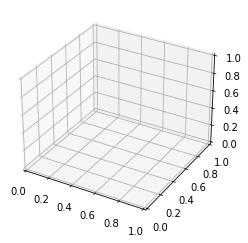

In [17]:
# Create a 3D scatter plot of the predicted and true values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_points = batch

# Create a colormap for color gradation
cmap = plt.get_cmap('Reds')

for i, (predictValue, trueValue) in enumerate(zip(predic, test)):
    color = cmap(i / num_points)
    ax.scatter(predictValue[0], predictValue[1], predictValue[2], color=color, marker='o')
    ax.scatter(trueValue[0], trueValue[1], trueValue[2], color=color, marker='^')

# Set the limits for each axis
# ax.set_xlim([0, 10])
# ax.set_ylim([0, 10])
# ax.set_zlim([-10, 10])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create custom legend handles
predicted_handle = mlines.Line2D([], [], color='gray', marker='o', linestyle='', markersize=7, label='Predicted')
true_handle = mlines.Line2D([], [], color='gray', marker='^', linestyle='', markersize=7, label='True')
ax.legend(handles=[predicted_handle, true_handle], loc='upper right')

plt.show()

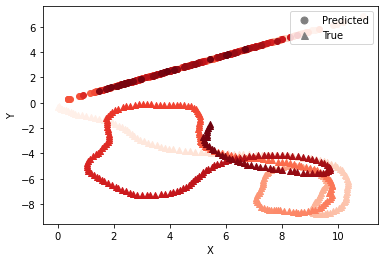

In [18]:
# Create a 2D scatter plot of the predicted and true values
fig, ax = plt.subplots()
num_points = batch * itt

# Create a colormap for color gradation
cmap = plt.get_cmap('Reds')

for i, (predictValue, trueValue) in enumerate(zip(predic, test)):
    color = cmap(i / num_points)
    ax.scatter(predictValue[0], predictValue[1], color=color, marker='o')
    ax.scatter(trueValue[0], trueValue[1], color=color, marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')

# Create custom legend handles
predicted_handle = plt.Line2D([], [], color='gray', marker='o', linestyle='', markersize=7, label='Predicted')
true_handle = plt.Line2D([], [], color='gray', marker='^', linestyle='', markersize=7, label='True')
ax.legend(handles=[predicted_handle, true_handle], loc='upper right')

plt.show()
